In [24]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv
import PIL
from mpl_toolkits.mplot3d import Axes3D
import mercury as mr
import os

imagefolder = f"{os.getcwd()}\\ImagesForPresentation"

image_list = [plt.imread(f"{imagefolder}\\{img}") for img in os.listdir(imagefolder)]
print(len(image_list))
current_image = 0
def change_image(current_image):
    plt.imshow(image_list[current_image])
    plt.show()

    current_image += 1
    if current_image >= len(image_list):
        current_image = 0
        
    return current_image
    



app  = mr.App(title="Find Grass plane using RANSAC, with colour thresholding", description="Advanced Robotic Perception - Mini Project presentation ROB7")

2


mercury.App

Plane detection for large grass areas

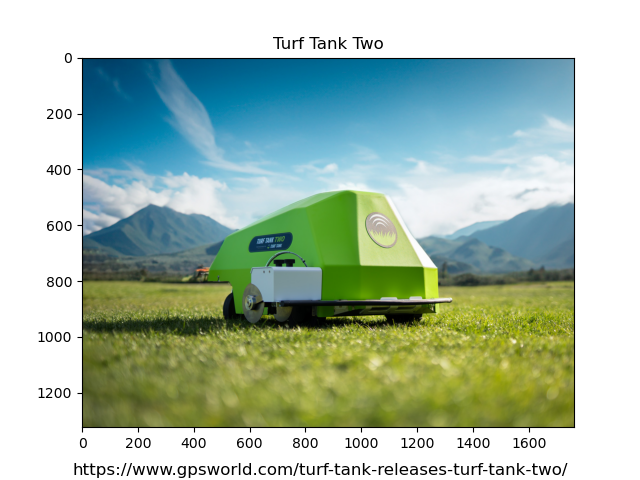

In [35]:
mr.Markdown("Plane detection for large grass areas")
plt.figure()
plt.title("Turf Tank Two")
source1 = "https://www.gpsworld.com/turf-tank-releases-turf-tank-two/"
plt.figtext(0.5, 0.01, source1, wrap=True, horizontalalignment='center', fontsize=12)
current_image=change_image(current_image)

* The Poblem at hand
- "Blind" robot
- Identification of unmapped obstacles

* Recurring features ?
- Big constant Grass plane
- RANSAC algorithmn
- Problemms with other


# Data Aqcusition

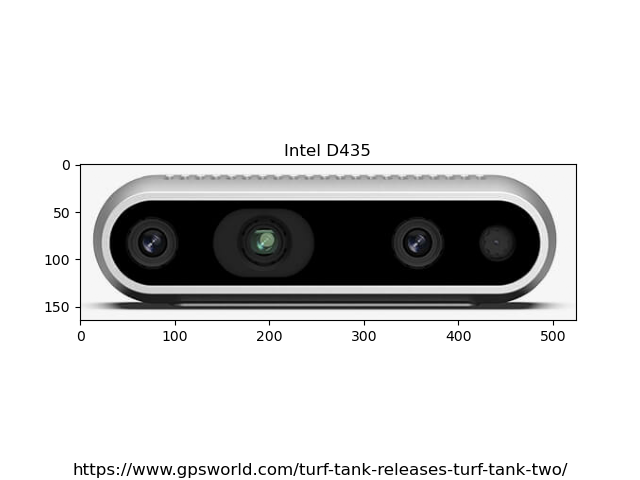

In [34]:
mr.Markdown("# Data Aqcusition")

plt.title("Intel D435")
current_image=change_image(current_image)

* THIS IS THE SECOND SLIDE??




In [ ]:
mr.Markdown("## image with points")
Points = []
for i in range(0, 100):
    x = random.randint(0, 255)
    y = random.randint(0, 255)
    z = random.randint(0, 255)
    Points.append([x, y, z])

# Convert to numpy array
Points = np.array(Points)

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Points[:,0], Points[:,1], Points[:,2], c='r', marker='o')
plt.show()

In [2]:
#generate seed for random





NameError: name 'mr' is not defined

In [ ]:
# Step 1: Choose three random points from your data
np.random.shuffle(Points)  # Shuffle the data
plane_points = Points[:3]

# Step 2: Calculate the equation of the plane
# You can use the cross product of two vectors on the plane to get the normal vector
vector1 = plane_points[1] - plane_points[0]
vector2 = plane_points[2] - plane_points[0]
normal_vector = np.cross(vector1, vector2)

# Convert the normal_vector to the same data type as Points
normal_vector = normal_vector.astype(Points.dtype)

# Normalize the normal vector
normal_vector = np.divide(normal_vector, np.linalg.norm(normal_vector))

# Calculate the plane equation: ax + by + cz + d = 0
a, b, c = normal_vector
d = -np.dot(normal_vector, plane_points[0])

# Step 3: Generate points on the plane
x_plane, y_plane = np.meshgrid(np.arange(256, dtype=Points.dtype), np.arange(256, dtype=Points.dtype))
z_plane = (-a * x_plane - b * y_plane - d) / float(c) # convert c to float

# Cast the output of the division to an integer
z_plane = z_plane.astype(np.int32)

# Plot the data points and the plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Points[:, 0], Points[:, 1], Points[:, 2], c='r', marker='o')
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, cmap='viridis')
plt.show()

# Step 4: Find the distance between the plane and each point

